#**Building an Algorithm System for Trading Cryptocurrencies Code**

#Libraries

In [1]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from keras.models import load_model

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#Collection of the data of BTC, ETH, BNB in USD with yfinance

##Dates

In [2]:
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)

##BTC-USD

In [3]:
btc_usd = yf.download(tickers='BTC-USD', start= start,end=end, interval = '1d')
btc_usd

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-28,8939.269531,9412.089844,8931.990234,9348.480469,9348.480469,7805479936
2018-04-29,9346.410156,9531.490234,9193.709961,9419.080078,9419.080078,8853000192
2018-04-30,9426.110352,9477.139648,9166.809570,9240.549805,9240.549805,8673920000
2018-05-01,9251.469727,9255.879883,8891.049805,9119.009766,9119.009766,7713019904
2018-05-02,9104.599609,9256.519531,9015.139648,9235.919922,9235.919922,7558159872
...,...,...,...,...,...,...
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,27591.384766,12785446832
2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,27525.339844,17703288330
2023-04-25,27514.873047,28371.078125,27207.931641,28307.597656,28307.597656,17733373139


In [4]:
round(btc_usd.head(5),2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-28,8939.27,9412.09,8931.99,9348.48,9348.48,7805479936
2018-04-29,9346.41,9531.49,9193.71,9419.08,9419.08,8853000192
2018-04-30,9426.11,9477.14,9166.81,9240.55,9240.55,8673920000
2018-05-01,9251.47,9255.88,8891.05,9119.01,9119.01,7713019904
2018-05-02,9104.60,9256.52,9015.14,9235.92,9235.92,7558159872


In [5]:
round(btc_usd.describe(),2)

,Open,High,Low,Close,Adj Close,Volume
count,1826.00,1826.00,1826.00,1826.00,1826.00,1.826000e+03
mean,21245.63,21754.76,20686.86,21254.70,21254.70,2.756245e+10
std,16806.06,17249.22,16290.50,16800.13,16800.13,1.940134e+10
min,3236.27,3275.38,3191.30,3236.76,3236.76,2.923670e+09
25%,7910.97,8085.22,7682.09,7910.15,7910.15,1.546620e+10
50%,13091.65,13631.78,12921.16,13189.67,13189.67,2.536808e+10
75%,33789.31,34790.41,32267.99,33740.26,33740.26,3.614411e+10
max,67549.73,68789.62,66382.06,67566.83,67566.83,3.509679e+11


In [6]:
figure_btc = px.line(btc_usd["Adj Close"], x = btc_usd.index, 
                 y = "Adj Close", 
                 title = "Time Series BTC-USD")
figure_btc.show()

##ETH-USD

In [7]:
eth_usd = yf.download(tickers='ETH-USD', start= start,end=end, interval = '1d')
eth_usd

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-28,644.645996,691.442017,644.645996,683.677979,683.677979,2496659968
2018-04-29,683.911987,697.755981,670.513000,688.880981,688.880981,2740559872
2018-04-30,689.760986,694.439026,666.117004,669.924011,669.924011,2853100032
2018-05-01,670.463013,674.403015,637.539978,673.612976,673.612976,2678960128
2018-05-02,674.075012,688.841980,667.419983,687.148987,687.148987,2822269952
...,...,...,...,...,...,...
2023-04-23,1874.171509,1882.229736,1838.992432,1862.062012,1862.062012,6607451862
2023-04-24,1862.085327,1888.193726,1811.792114,1842.757446,1842.757446,8438191338
2023-04-25,1842.204346,1877.484985,1805.322876,1866.753662,1866.753662,8677255481


In [8]:
round(eth_usd.head(5),2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-28,644.65,691.44,644.65,683.68,683.68,2496659968
2018-04-29,683.91,697.76,670.51,688.88,688.88,2740559872
2018-04-30,689.76,694.44,666.12,669.92,669.92,2853100032
2018-05-01,670.46,674.40,637.54,673.61,673.61,2678960128
2018-05-02,674.08,688.84,667.42,687.15,687.15,2822269952


In [9]:
round(eth_usd.describe(),2)

,Open,High,Low,Close,Adj Close,Volume
count,1826.00,1826.00,1826.00,1826.00,1826.00,1.826000e+03
mean,1203.23,1239.75,1162.37,1203.71,1203.71,1.357494e+10
std,1202.19,1238.76,1160.19,1201.74,1201.74,1.053858e+10
min,84.28,85.34,82.83,84.31,84.31,1.084810e+09
25%,209.03,213.73,203.59,208.92,208.92,6.262229e+09
50%,579.55,594.55,560.02,578.84,578.84,1.134570e+10
75%,1847.93,1886.73,1793.69,1849.24,1849.24,1.836379e+10
max,4810.07,4891.70,4718.04,4812.09,4812.09,8.448291e+10


In [10]:
figure_eth = px.line(eth_usd["Adj Close"], x = eth_usd.index, 
                 y = "Adj Close", 
                 title = "Time Series ETH-USD")
figure_eth.show()

##BNB-USD

In [11]:
bnb_usd = yf.download(tickers='BNB-USD',start= start,end=end, interval = '1d')
bnb_usd

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-28,14.283100,15.328600,14.225500,15.200100,15.200100,122360000
2018-04-29,15.164200,15.397500,14.555700,15.056200,15.056200,105495000
2018-04-30,15.062700,15.156700,14.109300,14.312100,14.312100,83765800
2018-05-01,14.314600,14.314600,13.614800,14.164300,14.164300,75433904
2018-05-02,14.170200,14.409200,13.940400,14.409200,14.409200,80730304
...,...,...,...,...,...,...
2023-04-23,332.013336,332.220703,327.779541,330.618835,330.618835,639990072
2023-04-24,330.621307,333.448120,328.144867,331.245880,331.245880,662758378
2023-04-25,331.200500,339.701172,328.806793,338.325562,338.325562,682400159


In [12]:
round(bnb_usd.head(5),2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-28,14.28,15.33,14.23,15.20,15.20,122360000
2018-04-29,15.16,15.40,14.56,15.06,15.06,105495000
2018-04-30,15.06,15.16,14.11,14.31,14.31,83765800
2018-05-01,14.31,14.31,13.61,14.16,14.16,75433904
2018-05-02,14.17,14.41,13.94,14.41,14.41,80730304


In [13]:
round(bnb_usd.describe(),2)

,Open,High,Low,Close,Adj Close,Volume
count,1826.00,1826.00,1826.00,1826.00,1826.00,1.826000e+03
mean,169.82,175.16,164.07,169.96,169.96,1.024144e+09
std,183.93,189.77,177.43,183.85,183.85,1.433488e+09
min,4.53,4.64,4.19,4.53,4.53,9.050190e+06
25%,16.22,16.57,15.80,16.26,16.26,1.980859e+08
50%,31.24,32.17,30.25,31.32,31.32,4.531278e+08
75%,311.91,319.28,303.27,311.99,311.99,1.431768e+09
max,676.32,690.93,634.55,675.68,675.68,1.798295e+10


In [14]:
figure_bnb = px.line(bnb_usd["Adj Close"], x = bnb_usd.index, 
                 y = "Adj Close", 
                 title = "Time Series BNB-USD")
figure_bnb.show()

#Algotrading Moving Average Crossover (benchmark)

In [15]:
# Define the moving averages
short_moving_averages = [3, 5, 7, 9, 11]
long_moving_averages = [14, 16, 18, 20, 22]
bull_bear_moving_averages = [50,100, 150, 200, 250, 300]

##BTC-USD

In [16]:
btc_usd = yf.download(tickers='BTC-USD', start= start,end=end, interval='1d')

results = []

for bull_bear_ma in bull_bear_moving_averages:
    for short_ma in short_moving_averages:
        for long_ma in long_moving_averages:
          btc_usd['SMA_short'] = btc_usd['Adj Close'].rolling(short_ma).mean()
          btc_usd['SMA_long'] = btc_usd['Adj Close'].rolling(long_ma).mean()
          btc_usd['SMA_bull_bear'] = btc_usd['Adj Close'].rolling(bull_bear_ma).mean()
          btc = btc_usd[['Adj Close', 'SMA_short', 'SMA_long', 'SMA_bull_bear']].dropna()

          Buy = []
          Sell = []
          for i in range(len(btc)):
              if btc.SMA_short.iloc[i] > btc.SMA_long[i] \
                      and btc.SMA_short.iloc[i - 1] < btc.SMA_long[i - 1] \
                      and btc['Adj Close'].iloc[i] > btc['SMA_bull_bear'].iloc[i]:
                  Buy.append(i)
              elif btc.SMA_short.iloc[i] < btc.SMA_long[i] \
                      and btc.SMA_short.iloc[i - 1] > btc.SMA_long[i - 1] \
                      and btc['Adj Close'].iloc[i] < btc['SMA_bull_bear'].iloc[i]:
                  Sell.append(i)

          initial_capital = 10000
          position = 0
          backtest_data = btc.copy()
          backtest_data['Buy_Signal'] = False
          backtest_data['Sell_Signal'] = False
          backtest_data.loc[backtest_data.index[Buy], 'Buy_Signal'] = True
          backtest_data.loc[backtest_data.index[Sell], 'Sell_Signal'] = True
          backtest_data['Position'] = 0
          backtest_data['Cash'] = initial_capital

          successful_trades = 0
          total_trades = 0

          for i in range(1, len(backtest_data)):
              if backtest_data['Buy_Signal'][i] and position == 0:
                  position = backtest_data['Cash'][i - 1] / backtest_data['Adj Close'][i]
                  backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
              elif backtest_data['Sell_Signal'][i] and position > 0:
                  current_value = position * backtest_data['Adj Close'][i]
                  profit = current_value - backtest_data['Cash'][i - 1]

                  if profit > 0:
                      successful_trades += 1

                  total_trades += 1
                  backtest_data['Cash'][i] = current_value
                  position = 0
              else:
                  backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
              backtest_data['Position'][i] = position

          success_rate = successful_trades / total_trades if total_trades > 0 else None

          backtest_data['Total_Value'] = backtest_data['Cash'] + backtest_data['Position'] * backtest_data['Adj Close']
          total_return = (backtest_data['Total_Value'][-1] - initial_capital) / initial_capital
          annualized_return = (1 + total_return) ** (365 / len(backtest_data)) - 1
          final_capital = backtest_data['Total_Value'][-1]

          results.append({
              'short_ma': short_ma,
              'long_ma': long_ma,
              'bull_bear_ma': bull_bear_ma,
              'total_return_(%)': (total_return*100),
              'annualized_return_(%)': (annualized_return*100),
              'success_rate_(&)': (success_rate*100),
              'initial_capital': initial_capital,
              'final_capital': final_capital,
              'total_trades': total_trades,          
              'successful_trades': successful_trades 
          })

# Print results
results_df = pd.DataFrame(results)
print(results_df)

# Find the best combination of short, long, and bull_bear moving averages based on the highest annualized return
best_combination = results_df.loc[results_df['annualized_return_(%)'].idxmax()]
print("\nBest combination of short, long, and bull_bear moving averages:")
print(round(best_combination,2))

[*********************100%***********************]  1 of 1 completed
     short_ma  long_ma  bull_bear_ma  total_return_(%)  annualized_return_(%)  \
0           3       14            50       2001.080431              86.910135   
1           3       16            50        436.034664              41.181548   
2           3       18            50        569.526952              47.779677   
3           3       20            50       1668.331113              80.406637   
4           3       22            50        532.097549              46.043741   
..        ...      ...           ...               ...                    ...   
145        11       14           300        811.862266              69.610461   
146        11       16           300        888.142475              72.899006   
147        11       18           300        646.343432              61.681087   
148        11       20           300        582.162525              58.243130   
149        11       22           300    

Total Trades: 10.0
Successful Trades: 6
Initial Capital: $10000.00
Final Capital: $324267.30
Total Return: 3142.67%
Annualized Return: 104.34%


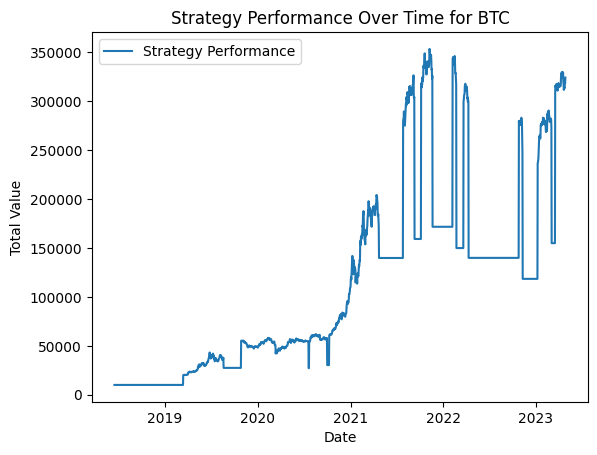

In [17]:
# Recompute the backtest_data for the best combination
short_ma = int(best_combination['short_ma'])
long_ma = int(best_combination['long_ma'])
bull_bear_ma = int(best_combination['bull_bear_ma'])


btc_usd['SMA_short'] = btc_usd['Adj Close'].rolling(short_ma).mean()
btc_usd['SMA_long'] = btc_usd['Adj Close'].rolling(long_ma).mean()
btc_usd['SMA_bull_bear'] = btc_usd['Adj Close'].rolling(bull_bear_ma).mean()
btc = btc_usd[['Adj Close', 'SMA_short', 'SMA_long', 'SMA_bull_bear']].dropna()

# Generate Buy and Sell signals
Buy = []
Sell = []
for i in range(len(btc)):
    if btc.SMA_short.iloc[i] > btc.SMA_long[i] \
            and btc.SMA_short.iloc[i - 1] < btc.SMA_long[i - 1] \
            and btc['Adj Close'].iloc[i] > btc['SMA_bull_bear'].iloc[i]:
        Buy.append(i)
    elif btc.SMA_short.iloc[i] < btc.SMA_long[i] \
            and btc.SMA_short.iloc[i - 1] > btc.SMA_long[i - 1] \
            and btc['Adj Close'].iloc[i] < btc['SMA_bull_bear'].iloc[i]:
        Sell.append(i)

# Initialize backtest_data and update it
initial_capital = 10000
position = 0
backtest_data = btc.copy()
backtest_data['Buy_Signal'] = False
backtest_data['Sell_Signal'] = False
backtest_data.loc[backtest_data.index[Buy], 'Buy_Signal'] = True
backtest_data.loc[backtest_data.index[Sell], 'Sell_Signal'] = True
backtest_data['Position'] = 0
backtest_data['Cash'] = initial_capital

total_trades = best_combination['total_trades']
successful_trades = 0

for i in range(1, len(backtest_data)):
    if backtest_data['Buy_Signal'][i] and position == 0:
        position = backtest_data['Cash'][i - 1] / backtest_data['Adj Close'][i]
        backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
    elif backtest_data['Sell_Signal'][i] and position > 0:
        current_value = position * backtest_data['Adj Close'][i]
        profit = current_value - backtest_data['Cash'][i - 1]

        if profit > 0:
            successful_trades += 1

        backtest_data['Cash'][i] = current_value
        position = 0
    else:
        backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
    backtest_data['Position'][i] = position

backtest_data['Total_Value'] = backtest_data['Cash'] + backtest_data['Position'] * backtest_data['Adj Close']

initial_capital = 10000
final_capital = backtest_data['Total_Value'][-1]
total_return = (final_capital - initial_capital) / initial_capital
annualized_return = (1 + total_return) ** (365 / len(backtest_data)) - 1

print(f"Total Trades: {total_trades}")
print(f"Successful Trades: {successful_trades}")
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Final Capital: ${final_capital:.2f}")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")

# Plot the performance of the strategy over time
plt.plot(backtest_data['Total_Value'], label='Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('Strategy Performance Over Time for BTC')
plt.legend()
plt.show()

##ETH-USD

In [18]:
eth_usd = yf.download(tickers='ETH-USD', start= start,end=end, interval='1d')

results = []

for bull_bear_ma in bull_bear_moving_averages:
    for short_ma in short_moving_averages:
        for long_ma in long_moving_averages:
          eth_usd['SMA_short'] = eth_usd['Adj Close'].rolling(short_ma).mean()
          eth_usd['SMA_long'] = eth_usd['Adj Close'].rolling(long_ma).mean()
          eth_usd['SMA_bull_bear'] = eth_usd['Adj Close'].rolling(bull_bear_ma).mean()
          eth = eth_usd[['Adj Close', 'SMA_short', 'SMA_long', 'SMA_bull_bear']].dropna()

          Buy = []
          Sell = []
          for i in range(len(eth)):
              if eth.SMA_short.iloc[i] > eth.SMA_long[i] \
                      and eth.SMA_short.iloc[i - 1] < eth.SMA_long[i - 1] \
                      and eth['Adj Close'].iloc[i] > eth['SMA_bull_bear'].iloc[i]:
                  Buy.append(i)
              elif eth.SMA_short.iloc[i] < eth.SMA_long[i] \
                      and eth.SMA_short.iloc[i - 1] > eth.SMA_long[i - 1] \
                      and eth['Adj Close'].iloc[i] < eth['SMA_bull_bear'].iloc[i]:
                  Sell.append(i)

          initial_capital = 10000
          position = 0
          backtest_data = eth.copy()
          backtest_data['Buy_Signal'] = False
          backtest_data['Sell_Signal'] = False
          backtest_data.loc[backtest_data.index[Buy], 'Buy_Signal'] = True
          backtest_data.loc[backtest_data.index[Sell], 'Sell_Signal'] = True
          backtest_data['Position'] = 0
          backtest_data['Cash'] = initial_capital

          successful_trades = 0
          total_trades = 0

          for i in range(1, len(backtest_data)):
              if backtest_data['Buy_Signal'][i] and position == 0:
                  position = backtest_data['Cash'][i - 1] / backtest_data['Adj Close'][i]
                  backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
              elif backtest_data['Sell_Signal'][i] and position > 0:
                  current_value = position * backtest_data['Adj Close'][i]
                  profit = current_value - backtest_data['Cash'][i - 1]

                  if profit > 0:
                      successful_trades += 1

                  total_trades += 1
                  backtest_data['Cash'][i] = current_value
                  position = 0
              else:
                  backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
              backtest_data['Position'][i] = position

          success_rate = successful_trades / total_trades if total_trades > 0 else None

          backtest_data['Total_Value'] = backtest_data['Cash'] + backtest_data['Position'] * backtest_data['Adj Close']
          total_return = (backtest_data['Total_Value'][-1] - initial_capital) / initial_capital
          annualized_return = (1 + total_return) ** (365 / len(backtest_data)) - 1
          final_capital = backtest_data['Total_Value'][-1]

          results.append({
              'short_ma': short_ma,
              'long_ma': long_ma,
              'bull_bear_ma': bull_bear_ma,
              'total_return_%': total_return *100,
              'annualized_return_%': annualized_return*100,
              'success_rate_%': success_rate*100,
              'initial_capital': initial_capital,
              'final_capital': final_capital,
              'total_trades': total_trades,          
              'successful_trades': successful_trades 
          })

# Print results
results_df = pd.DataFrame(results)
print(results_df)

# Find the best combination of short, long, and bull_bear moving averages based on the highest annualized return
best_combination = results_df.loc[results_df['total_return_%'].idxmax()]
print("\nBest combination of short, long, and bull_bear moving averages:")
print(round(best_combination,2))

[*********************100%***********************]  1 of 1 completed
     short_ma  long_ma  bull_bear_ma  total_return_%  annualized_return_%  \
0           3       14            50     3705.289274           111.161804   
1           3       16            50     1143.061613            67.807504   
2           3       18            50     1074.963208            65.876748   
3           3       20            50      985.770178            63.208591   
4           3       22            50     2415.990087            93.958548   
..        ...      ...           ...             ...                  ...   
145        11       14           300     1242.622553            86.044017   
146        11       16           300     1456.290660            92.728691   
147        11       18           300     1502.538288            94.082463   
148        11       20           300     1643.057031            98.021196   
149        11       22           300     1671.207456            98.780974   

     s

Total Trades: 11.0
Successful Trades: 6
Initial Capital: $10000.00
Final Capital: $380528.93
Total Return: 3705.29%
Annualized Return: 111.16%


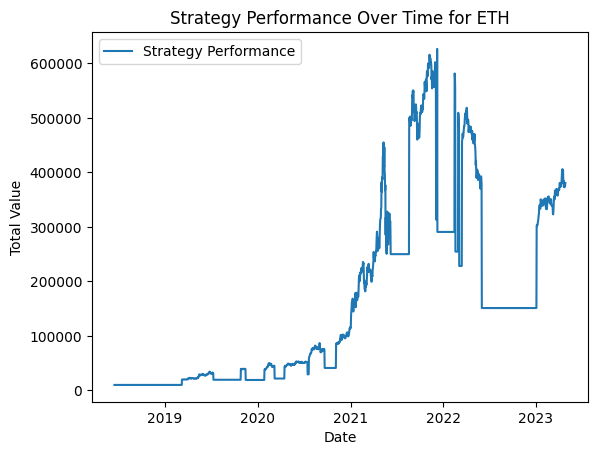

In [19]:
# Recompute the backtest_data for the best combination
short_ma = int(best_combination['short_ma'])
long_ma = int(best_combination['long_ma'])
bull_bear_ma = int(best_combination['bull_bear_ma'])


eth_usd['SMA_short'] = eth_usd['Adj Close'].rolling(short_ma).mean()
eth_usd['SMA_long'] = eth_usd['Adj Close'].rolling(long_ma).mean()
eth_usd['SMA_bull_bear'] = eth_usd['Adj Close'].rolling(bull_bear_ma).mean()
eth = eth_usd[['Adj Close', 'SMA_short', 'SMA_long', 'SMA_bull_bear']].dropna()

# Generate Buy and Sell signals
Buy = []
Sell = []
for i in range(len(eth)):
    if eth.SMA_short.iloc[i] > eth.SMA_long[i] \
            and eth.SMA_short.iloc[i - 1] < eth.SMA_long[i - 1] \
            and eth['Adj Close'].iloc[i] > eth['SMA_bull_bear'].iloc[i]:
        Buy.append(i)
    elif eth.SMA_short.iloc[i] < eth.SMA_long[i] \
            and eth.SMA_short.iloc[i - 1] > eth.SMA_long[i - 1] \
            and eth['Adj Close'].iloc[i] < eth['SMA_bull_bear'].iloc[i]:
        Sell.append(i)

# Initialize backtest_data and update it
initial_capital = 10000
position = 0
backtest_data = eth.copy()
backtest_data['Buy_Signal'] = False
backtest_data['Sell_Signal'] = False
backtest_data.loc[backtest_data.index[Buy], 'Buy_Signal'] = True
backtest_data.loc[backtest_data.index[Sell], 'Sell_Signal'] = True
backtest_data['Position'] = 0
backtest_data['Cash'] = initial_capital

total_trades = best_combination['total_trades']
successful_trades = 0

for i in range(1, len(backtest_data)):
    if backtest_data['Buy_Signal'][i] and position == 0:
        position = backtest_data['Cash'][i - 1] / backtest_data['Adj Close'][i]
        backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
    elif backtest_data['Sell_Signal'][i] and position > 0:
        current_value = position * backtest_data['Adj Close'][i]
        profit = current_value - backtest_data['Cash'][i - 1]

        if profit > 0:
            successful_trades += 1

        backtest_data['Cash'][i] = current_value
        position = 0
    else:
        backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
    backtest_data['Position'][i] = position

backtest_data['Total_Value'] = backtest_data['Cash'] + backtest_data['Position'] * backtest_data['Adj Close']

initial_capital = 10000
final_capital = backtest_data['Total_Value'][-1]
total_return = (final_capital - initial_capital) / initial_capital
annualized_return = (1 + total_return) ** (365 / len(backtest_data)) - 1

print(f"Total Trades: {total_trades}")
print(f"Successful Trades: {successful_trades}")
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Final Capital: ${final_capital:.2f}")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")

# Plot the performance of the strategy over time
plt.plot(backtest_data['Total_Value'], label='Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('Strategy Performance Over Time for ETH')
plt.legend()
plt.show()

##BNB-USD

In [20]:
bnb_usd = yf.download(tickers='BNB-USD', start= start,end=end, interval='1d')

results = []

for bull_bear_ma in bull_bear_moving_averages:
    for short_ma in short_moving_averages:
        for long_ma in long_moving_averages:
          bnb_usd['SMA_short'] = bnb_usd['Adj Close'].rolling(short_ma).mean()
          bnb_usd['SMA_long'] = bnb_usd['Adj Close'].rolling(long_ma).mean()
          bnb_usd['SMA_bull_bear'] = bnb_usd['Adj Close'].rolling(bull_bear_ma).mean()
          bnb = bnb_usd[['Adj Close', 'SMA_short', 'SMA_long', 'SMA_bull_bear']].dropna()

          Buy = []
          Sell = []
          for i in range(len(bnb)):
              if bnb.SMA_short.iloc[i] > bnb.SMA_long[i] \
                      and bnb.SMA_short.iloc[i - 1] < bnb.SMA_long[i - 1] \
                      and bnb['Adj Close'].iloc[i] > bnb['SMA_bull_bear'].iloc[i]:
                  Buy.append(i)
              elif bnb.SMA_short.iloc[i] < bnb.SMA_long[i] \
                      and bnb.SMA_short.iloc[i - 1] > bnb.SMA_long[i - 1] \
                      and bnb['Adj Close'].iloc[i] < bnb['SMA_bull_bear'].iloc[i]:
                  Sell.append(i)

          initial_capital = 10000
          position = 0
          backtest_data = bnb.copy()
          backtest_data['Buy_Signal'] = False
          backtest_data['Sell_Signal'] = False
          backtest_data.loc[backtest_data.index[Buy], 'Buy_Signal'] = True
          backtest_data.loc[backtest_data.index[Sell], 'Sell_Signal'] = True
          backtest_data['Position'] = 0
          backtest_data['Cash'] = initial_capital

          successful_trades = 0
          total_trades = 0

          for i in range(1, len(backtest_data)):
              if backtest_data['Buy_Signal'][i] and position == 0:
                  position = backtest_data['Cash'][i - 1] / backtest_data['Adj Close'][i]
                  backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
              elif backtest_data['Sell_Signal'][i] and position > 0:
                  current_value = position * backtest_data['Adj Close'][i]
                  profit = current_value - backtest_data['Cash'][i - 1]

                  if profit > 0:
                      successful_trades += 1

                  total_trades += 1
                  backtest_data['Cash'][i] = current_value
                  position = 0
              else:
                  backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
              backtest_data['Position'][i] = position

          success_rate = successful_trades / total_trades if total_trades > 0 else None

          backtest_data['Total_Value'] = backtest_data['Cash'] + backtest_data['Position'] * backtest_data['Adj Close']
          total_return = (backtest_data['Total_Value'][-1] - initial_capital) / initial_capital
          annualized_return = (1 + total_return) ** (365 / len(backtest_data)) - 1
          final_capital = backtest_data['Total_Value'][-1]

          results.append({
              'short_ma': short_ma,
              'long_ma': long_ma,
              'bull_bear_ma': bull_bear_ma,
              'total_return_%': total_return *100,
              'annualized_return_%': annualized_return*100,
              'success_rate_%': success_rate*100,
              'initial_capital': initial_capital,
              'final_capital': final_capital,
              'total_trades': total_trades,          
              'successful_trades': successful_trades 
          })

# Print results
results_df = pd.DataFrame(results)
print(results_df)

# Find the best combination of short, long, and bull_bear moving averages based on the highest annualized return
best_combination = results_df.loc[results_df['total_return_%'].idxmax()]
print("\nBest combination of short, long, and bull_bear moving averages:")
print(round(best_combination,2))

[*********************100%***********************]  1 of 1 completed
     short_ma  long_ma  bull_bear_ma  total_return_%  annualized_return_%  \
0           3       14            50     6827.118010           138.810738   
1           3       16            50     2424.574858            94.094300   
2           3       18            50     6203.946428           134.231157   
3           3       20            50    10916.432346           162.687884   
4           3       22            50    13756.054500           175.358085   
..        ...      ...           ...             ...                  ...   
145        11       14           300     3480.128704           135.195822   
146        11       16           300     2836.347113           124.311296   
147        11       18           300     2360.561786           115.030471   
148        11       20           300     1950.186242           105.853843   
149        11       22           300     1832.124555           102.956038   

     s

Total Trades: 9.0
Successful Trades: 6
Initial Capital: $10000.00
Final Capital: $2553147.00
Total Return: 25431.47%
Annualized Return: 212.19%


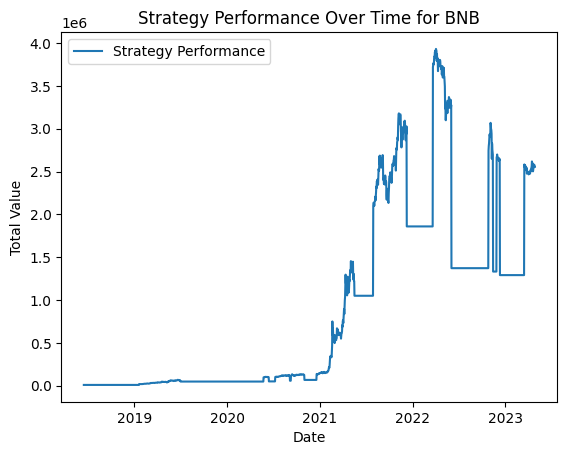

In [21]:
# Recompute the backtest_data for the best combination
short_ma = int(best_combination['short_ma'])
long_ma = int(best_combination['long_ma'])
bull_bear_ma = int(best_combination['bull_bear_ma'])


bnb_usd['SMA_short'] = bnb_usd['Adj Close'].rolling(short_ma).mean()
bnb_usd['SMA_long'] = bnb_usd['Adj Close'].rolling(long_ma).mean()
bnb_usd['SMA_bull_bear'] = bnb_usd['Adj Close'].rolling(bull_bear_ma).mean()
bnb = bnb_usd[['Adj Close', 'SMA_short', 'SMA_long', 'SMA_bull_bear']].dropna()

# Generate Buy and Sell signals
Buy = []
Sell = []
for i in range(len(bnb)):
    if bnb.SMA_short.iloc[i] > bnb.SMA_long[i] \
            and bnb.SMA_short.iloc[i - 1] < bnb.SMA_long[i - 1] \
            and bnb['Adj Close'].iloc[i] > bnb['SMA_bull_bear'].iloc[i]:
        Buy.append(i)
    elif bnb.SMA_short.iloc[i] < bnb.SMA_long[i] \
            and bnb.SMA_short.iloc[i - 1] > bnb.SMA_long[i - 1] \
            and bnb['Adj Close'].iloc[i] < bnb['SMA_bull_bear'].iloc[i]:
        Sell.append(i)

# Initialize backtest_data and update it
initial_capital = 10000
position = 0
backtest_data = bnb.copy()
backtest_data['Buy_Signal'] = False
backtest_data['Sell_Signal'] = False
backtest_data.loc[backtest_data.index[Buy], 'Buy_Signal'] = True
backtest_data.loc[backtest_data.index[Sell], 'Sell_Signal'] = True
backtest_data['Position'] = 0
backtest_data['Cash'] = initial_capital

total_trades = best_combination['total_trades']
successful_trades = 0

for i in range(1, len(backtest_data)):
    if backtest_data['Buy_Signal'][i] and position == 0:
        position = backtest_data['Cash'][i - 1] / backtest_data['Adj Close'][i]
        backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
    elif backtest_data['Sell_Signal'][i] and position > 0:
        current_value = position * backtest_data['Adj Close'][i]
        profit = current_value - backtest_data['Cash'][i - 1]

        if profit > 0:
            successful_trades += 1

        backtest_data['Cash'][i] = current_value
        position = 0
    else:
        backtest_data['Cash'][i] = backtest_data['Cash'][i - 1]
    backtest_data['Position'][i] = position

backtest_data['Total_Value'] = backtest_data['Cash'] + backtest_data['Position'] * backtest_data['Adj Close']

initial_capital = 10000
final_capital = backtest_data['Total_Value'][-1]
total_return = (final_capital - initial_capital) / initial_capital
annualized_return = (1 + total_return) ** (365 / len(backtest_data)) - 1

print(f"Total Trades: {total_trades}")
print(f"Successful Trades: {successful_trades}")
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Final Capital: ${final_capital:.2f}")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")

# Plot the performance of the strategy over time
plt.plot(backtest_data['Total_Value'], label='Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('Strategy Performance Over Time for BNB')
plt.legend()
plt.show()

#Algotrading Harmonic Patterns

##Model 

In [22]:
#harmonics_func.py
def peak_detect(price,order):
    # Find our relative extrema
    # Return the max indexes of the extrema
    max_idx = list(argrelextrema(price, np.greater, order=order)[0])
    # Return the min indexes of the extrema
    min_idx = list(argrelextrema(price, np.less, order=order)[0])
    idx = max_idx + min_idx + [len(price) - 1]

    idx.sort()
    current_idx = idx[-5:]

    start = min(current_idx)
    end = max(current_idx)

    current_pat = price[current_idx]
    return current_idx, current_pat, start, end

def is_gartley(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.27 - err_allowed, 1.618 + err_allowed]) * abs(BC)

    if XA>0 and AB<0 and BC>0 and CD<0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
           return 1
        else:
            return np.NaN
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < \
                CD_range[1]:
            return -1
        else:
            return np.NaN
    else:
        return np.NaN

def is_butterfly(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.786 - err_allowed, 0.786 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)

    if XA>0 and AB<0 and BC>0 and CD<0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
           return 1
        else:
            return np.NaN
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < \
                CD_range[1]:
            return -1
        else:
            return np.NaN
    else:
        return np.NaN

def is_bat(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.382 - err_allowed, 0.5 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)

    if XA>0 and AB<0 and BC>0 and CD<0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
           return 1
 
        else:
            return np.NaN
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < \
                CD_range[1]:
            return -1
  
        else:
            return np.NaN
    else:
        return np.NaN

def is_crab(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]

    AB_range = np.array([0.382 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.24 - err_allowed, 3.618 + err_allowed]) * abs(BC)

    if XA>0 and AB<0 and BC>0 and CD<0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
           return 1

        else:
            return np.NaN
    elif XA<0 and AB>0 and BC<0 and CD>0:

        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < \
                CD_range[1]:
            return -1

        else:
            return np.NaN
    else:
        return np.NaN

##BTC-USD

In [23]:
#dates
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)

# Fetch the data
data = yf.download(tickers='BTC-USD', start=start, end=end, interval='1d')
data.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
data = pd.DataFrame(data)
price = data.Adj_Close.copy()

orders = [2, 5, 10, 15, 20, 25,50,75, 100, 125, 150,175,200,225,250]

# Hyperparameters
take_profits = [0.01, 0.03, 0.05, 0.07, 0.1,0.5,1,1.5,2,2.5,3]
stop_losses = [0.01, 0.03, 0.05, 0.07, 0.1,0.5,1,1.5,2,2.5,3]
errors_allowed = [0,0.05, 0.1, 0.5, 1]
err_allowed = 0.0
# Initial capital
initial_capital = 10000



# Define the backtest function
def backtest(price, harmonics, initial_capital, take_profit, stop_loss):
    trades = []
    trade_dates = []  # New list to store trade dates
    for i in range(len(harmonics)):
        trade = {}
        trade["entry_price"] = price[i]
        trade["direction"] = harmonics[i]
        trade["take_profit"] = price[i] + price[i] * take_profit * trade["direction"]
        trade["stop_loss"] = price[i] - price[i] * stop_loss * trade["direction"]
        
        if trade["direction"] != 0:  # Only add non-zero harmonics trades
            trades.append(trade)
            trade_dates.append(price.index[i])

    pnl = []
    successful_trades = 0
    for trade in trades:
        if trade["direction"] == 1:  # Long trade
            if trade["take_profit"] <= trade["entry_price"] + trade["entry_price"] * 1000:
                pnl.append(trade["entry_price"] * take_profit)
                successful_trades += 1
            elif trade["stop_loss"] >= trade["entry_price"] - trade["entry_price"] * 500:
                pnl.append(-trade["entry_price"] * stop_loss)
        elif trade["direction"] == -1:  # Short trade
            if trade["take_profit"] >= trade["entry_price"] - trade["entry_price"] * 1000:
                pnl.append(trade["entry_price"] * take_profit)
                successful_trades += 1
            elif trade["stop_loss"] <= trade["entry_price"] + trade["entry_price"] * 500:
                pnl.append(-trade["entry_price"] * stop_loss)

    total_return = np.sum(pnl) / initial_capital
    annualized_return = (1 + total_return) ** (365 / len(price)) - 1
    if len(trades) > 0:
        success_rate = successful_trades / len(trades)
        accuracy = successful_trades / len(harmonics)
    else:
        success_rate = 0
        accuracy = 0

    return {
    "total_return": total_return,
    "annualized_return": annualized_return,
    "success_rate": success_rate,
    "accuracy": accuracy,
    "final_capital": initial_capital + np.sum(pnl),
    "number_of_trades": len(trades),
    "pnl": pnl,
    "trade_dates": trade_dates,
}

#Create a dictionary to store the results of each order
results_per_order = {}
best_result = None
best_totat_return = 0

#Perform backtesting
for order in tqdm(orders):
    harmonics = []
    for i in range(0, len(price) - 2 * order):
        current_idx, current_pat, start, end = peak_detect(price.values[i:i+2*order], order)
        current_idx = [index + i for index in current_idx]
        moves = current_pat - np.roll(current_pat, 1)

        if len(moves) >= 4:
            gartley = is_gartley(moves, err_allowed)
            butterfly = is_butterfly(moves, err_allowed)
            bat = is_bat(moves, err_allowed)
            crab = is_crab(moves, err_allowed)

            if not np.isnan(gartley):
                harmonics.append(gartley)
            elif not np.isnan(butterfly):
                harmonics.append(butterfly)
            elif not np.isnan(bat):
                harmonics.append(bat)
            elif not np.isnan(crab):
                harmonics.append(crab)
            else:
                harmonics.append(0)

    results = []
    for take_profit in take_profits:
        for stop_loss in stop_losses:
            for error_allowed in errors_allowed:
                # Adjust the error tolerance in the pattern detection functions
                err_allowed = error_allowed

                # Run backtest
                result = backtest(price, harmonics, initial_capital, take_profit, stop_loss)
                result["take_profit"] = take_profit
                result["stop_loss"] = stop_loss
                result["error_allowed"] = error_allowed
                result["order"] = order
                # Update the best result
                if result["total_return"] > best_totat_return:
                    best_result = result
                    best_totat_return = result["total_return"]
                


# Print the best result
print("Best result based on total return:")
print(f"Order: {best_result['order']}")
print(f"Take Profit: {best_result['take_profit']}, Stop Loss: {best_result['stop_loss']}, Error Allowed: {best_result['error_allowed']}")
print(f"Total return: {best_result['total_return'] * 100:.2f}%")
print(f"Annualized return: {best_result['annualized_return'] * 100:.2f}%")
print(f"Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Final capital: {best_result['final_capital']:.2f}")
print(f"Total number of trades: {best_result['number_of_trades']}\n")

[*********************100%***********************]  1 of 1 completed


100%|██████████| 15/15 [01:38<00:00,  6.58s/it]

Best result based on total return:
Order: 175
Take Profit: 3, Stop Loss: 0.01, Error Allowed: 0
Total return: 41002.26%
Annualized return: 233.03%
Accuracy: 29.79%
Final capital: 4110225.58
Total number of trades: 185



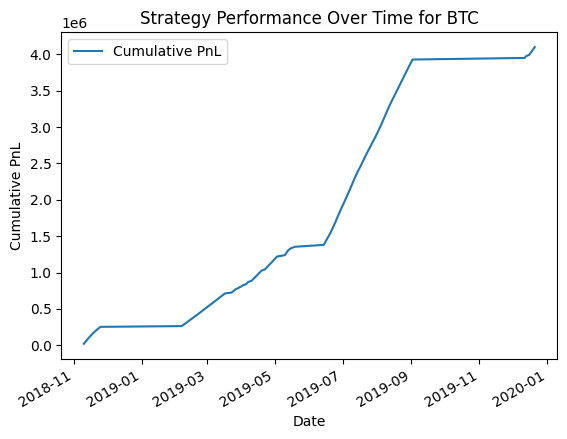

In [24]:
# Choose the strategy for which you want to plot the performance
strategy = best_result

# Calculate the cumulative PnL over time
cumulative_pnl = np.cumsum(strategy["pnl"])

# Create a DataFrame with the trade dates and cumulative PnL
trade_dates = strategy["trade_dates"]
performance_df = pd.DataFrame({"Date": trade_dates, "Cumulative PnL": cumulative_pnl})
performance_df.set_index("Date", inplace=True)

# Plot the cumulative PnL
performance_df.plot()
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.title("Strategy Performance Over Time for BTC")
plt.show()

##ETH-USD

In [25]:
#dates
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)

# Fetch the data
data = yf.download(tickers='ETH-USD', start=start, end=end, interval='1d')
data.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
data = pd.DataFrame(data)
price = data.Adj_Close.copy()

orders = [2, 5, 10, 15, 20, 25,50,75, 100, 125, 150,175,200,225,250]

# Hyperparameters
take_profits = [0.01, 0.03, 0.05, 0.07, 0.1,0.5,1,1.5,2,2.5,3]
stop_losses = [0.01, 0.03, 0.05, 0.07, 0.1,0.5,1,1.5,2,2.5,3]
errors_allowed = [0,0.05, 0.1, 0.5, 1]
err_allowed = 0.0
# Initial capital
initial_capital = 10000



# Define the backtest function
def backtest(price, harmonics, initial_capital, take_profit, stop_loss):
    trades = []
    trade_dates = []  # New list to store trade dates
    for i in range(len(harmonics)):
        trade = {}
        trade["entry_price"] = price[i]
        trade["direction"] = harmonics[i]
        trade["take_profit"] = price[i] + price[i] * take_profit * trade["direction"]
        trade["stop_loss"] = price[i] - price[i] * stop_loss * trade["direction"]
        
        if trade["direction"] != 0:  # Only add non-zero harmonics trades
            trades.append(trade)
            trade_dates.append(price.index[i])

    pnl = []
    successful_trades = 0
    for trade in trades:
        if trade["direction"] == 1:  # Long trade
            if trade["take_profit"] <= trade["entry_price"] + trade["entry_price"] * 1000:
                pnl.append(trade["entry_price"] * take_profit)
                successful_trades += 1
            elif trade["stop_loss"] >= trade["entry_price"] - trade["entry_price"] * 500:
                pnl.append(-trade["entry_price"] * stop_loss)
        elif trade["direction"] == -1:  # Short trade
            if trade["take_profit"] >= trade["entry_price"] - trade["entry_price"] * 1000:
                pnl.append(trade["entry_price"] * take_profit)
                successful_trades += 1
            elif trade["stop_loss"] <= trade["entry_price"] + trade["entry_price"] * 500:
                pnl.append(-trade["entry_price"] * stop_loss)

    total_return = np.sum(pnl) / initial_capital
    annualized_return = (1 + total_return) ** (365 / len(price)) - 1
    if len(trades) > 0:
        success_rate = successful_trades / len(trades)
        accuracy = successful_trades / len(harmonics)
    else:
        success_rate = 0
        accuracy = 0

    return {
    "total_return": total_return,
    "annualized_return": annualized_return,
    "success_rate": success_rate,
    "accuracy": accuracy,
    "final_capital": initial_capital + np.sum(pnl),
    "number_of_trades": len(trades),
    "pnl": pnl,
    "trade_dates": trade_dates,
}

#Create a dictionary to store the results of each order
results_per_order = {}
best_result = None
best_totat_return = 0

#Perform backtesting
for order in tqdm(orders):
    harmonics = []
    for i in range(0, len(price) - 2 * order):
        current_idx, current_pat, start, end = peak_detect(price.values[i:i+2*order], order)
        current_idx = [index + i for index in current_idx]
        moves = current_pat - np.roll(current_pat, 1)

        if len(moves) >= 4:
            gartley = is_gartley(moves, err_allowed)
            butterfly = is_butterfly(moves, err_allowed)
            bat = is_bat(moves, err_allowed)
            crab = is_crab(moves, err_allowed)

            if not np.isnan(gartley):
                harmonics.append(gartley)
            elif not np.isnan(butterfly):
                harmonics.append(butterfly)
            elif not np.isnan(bat):
                harmonics.append(bat)
            elif not np.isnan(crab):
                harmonics.append(crab)
            else:
                harmonics.append(0)

    results = []
    for take_profit in take_profits:
        for stop_loss in stop_losses:
            for error_allowed in errors_allowed:
                # Adjust the error tolerance in the pattern detection functions
                err_allowed = error_allowed

                # Run backtest
                result = backtest(price, harmonics, initial_capital, take_profit, stop_loss)
                result["take_profit"] = take_profit
                result["stop_loss"] = stop_loss
                result["error_allowed"] = error_allowed
                result["order"] = order
                # Update the best result
                if result["total_return"] > best_totat_return:
                    best_result = result
                    best_totat_return = result["total_return"]
                


# Print the best result
print("Best result based on total return:")
print(f"Order: {best_result['order']}")
print(f"Take Profit: {best_result['take_profit']}, Stop Loss: {best_result['stop_loss']}, Error Allowed: {best_result['error_allowed']}")
print(f"Total return: {best_result['total_return'] * 100:.2f}%")
print(f"Annualized return: {best_result['annualized_return'] * 100:.2f}%")
print(f"Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Final capital: {best_result['final_capital']:.2f}")
print(f"Total number of trades: {best_result['number_of_trades']}\n")

[*********************100%***********************]  1 of 1 completed


100%|██████████| 15/15 [01:36<00:00,  6.40s/it]

Best result based on total return:
Order: 225
Take Profit: 3, Stop Loss: 0.01, Error Allowed: 0
Total return: 1655.20%
Annualized return: 77.31%
Accuracy: 23.19%
Final capital: 175520.26
Total number of trades: 112



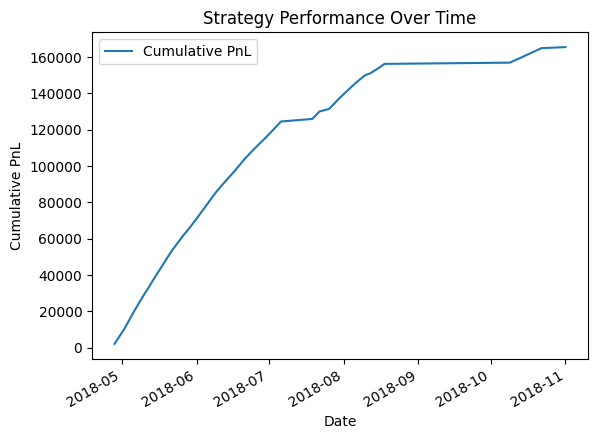

In [26]:
# Choose the strategy for which you want to plot the performance
strategy = best_result

# Calculate the cumulative PnL over time
cumulative_pnl = np.cumsum(strategy["pnl"])

# Create a DataFrame with the trade dates and cumulative PnL
trade_dates = strategy["trade_dates"]
performance_df = pd.DataFrame({"Date": trade_dates, "Cumulative PnL": cumulative_pnl})
performance_df.set_index("Date", inplace=True)

# Plot the cumulative PnL
performance_df.plot()
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.title("Strategy Performance Over Time")
plt.show()

##BNB-USD

In [27]:
#dates
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)

# Fetch the data
data = yf.download(tickers='BNB-USD',start=start, end=end, interval='1d')
data.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
data = pd.DataFrame(data)
price = data.Adj_Close.copy()

orders = [2, 5, 10, 15, 20, 25,50,75, 100, 125, 150,175,200,225,250]

# Hyperparameters
take_profits = [0.01, 0.03, 0.05, 0.07, 0.1,0.5,1,1.5,2,2.5,3]
stop_losses = [0.01, 0.03, 0.05, 0.07, 0.1,0.5,1,1.5,2,2.5,3]
errors_allowed = [0,0.05, 0.1, 0.5, 1]

# Initial capital
initial_capital = 10000



# Define the backtest function
def backtest(price, harmonics, initial_capital, take_profit, stop_loss):
    trades = []
    trade_dates = []  # New list to store trade dates
    for i in range(len(harmonics)):
        trade = {}
        trade["entry_price"] = price[i]
        trade["direction"] = harmonics[i]
        trade["take_profit"] = price[i] + price[i] * take_profit * trade["direction"]
        trade["stop_loss"] = price[i] - price[i] * stop_loss * trade["direction"]
        
        if trade["direction"] != 0:  # Only add non-zero harmonics trades
            trades.append(trade)
            trade_dates.append(price.index[i])

    pnl = []
    successful_trades = 0
    for trade in trades:
        if trade["direction"] == 1:  # Long trade
            if trade["take_profit"] <= trade["entry_price"] + trade["entry_price"] * 1000:
                pnl.append(trade["entry_price"] * take_profit)
                successful_trades += 1
            elif trade["stop_loss"] >= trade["entry_price"] - trade["entry_price"] * 500:
                pnl.append(-trade["entry_price"] * stop_loss)
        elif trade["direction"] == -1:  # Short trade
            if trade["take_profit"] >= trade["entry_price"] - trade["entry_price"] * 1000:
                pnl.append(trade["entry_price"] * take_profit)
                successful_trades += 1
            elif trade["stop_loss"] <= trade["entry_price"] + trade["entry_price"] * 500:
                pnl.append(-trade["entry_price"] * stop_loss)

    total_return = np.sum(pnl) / initial_capital
    annualized_return = (1 + total_return) ** (365 / len(price)) - 1
    if len(trades) > 0:
        success_rate = successful_trades / len(trades)
        accuracy = successful_trades / len(harmonics)
    else:
        success_rate = 0
        accuracy = 0

    return {
    "total_return": total_return,
    "annualized_return": annualized_return,
    "success_rate": success_rate,
    "accuracy": accuracy,
    "final_capital": initial_capital + np.sum(pnl),
    "number_of_trades": len(trades),
    "pnl": pnl,
    "trade_dates": trade_dates,
}

#Create a dictionary to store the results of each order
results_per_order = {}
best_result = None
best_totat_return = 0

#Perform backtesting
for order in tqdm(orders):
    harmonics = []
    for i in range(0, len(price) - 2 * order):
        current_idx, current_pat, start, end = peak_detect(price.values[i:i+2*order], order)
        current_idx = [index + i for index in current_idx]
        moves = current_pat - np.roll(current_pat, 1)

        if len(moves) >= 4:
            gartley = is_gartley(moves, err_allowed)
            butterfly = is_butterfly(moves, err_allowed)
            bat = is_bat(moves, err_allowed)
            crab = is_crab(moves, err_allowed)

            if not np.isnan(gartley):
                harmonics.append(gartley)
            elif not np.isnan(butterfly):
                harmonics.append(butterfly)
            elif not np.isnan(bat):
                harmonics.append(bat)
            elif not np.isnan(crab):
                harmonics.append(crab)
            else:
                harmonics.append(0)

    results = []
    for take_profit in take_profits:
        for stop_loss in stop_losses:
            for error_allowed in errors_allowed:
                # Adjust the error tolerance in the pattern detection functions
                err_allowed = error_allowed

                # Run backtest
                result = backtest(price, harmonics, initial_capital, take_profit, stop_loss)
                result["take_profit"] = take_profit
                result["stop_loss"] = stop_loss
                result["error_allowed"] = error_allowed
                result["order"] = order
                # Update the best result
                if result["total_return"] > best_totat_return:
                    best_result = result
                    best_totat_return = result["total_return"]
                


# Print the best result
print("Best result based on total return:")
print(f"Order: {best_result['order']}")
print(f"Take Profit: {best_result['take_profit']}, Stop Loss: {best_result['stop_loss']}, Error Allowed: {best_result['error_allowed']}")
print(f"Total return: {best_result['total_return'] * 100:.2f}%")
print(f"Annualized return: {best_result['annualized_return'] * 100:.2f}%")
print(f"Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Final capital: {best_result['final_capital']:.2f}")
print(f"Total number of trades: {best_result['number_of_trades']}\n")

[*********************100%***********************]  1 of 1 completed


100%|██████████| 15/15 [01:39<00:00,  6.63s/it]

Best result based on total return:
Order: 150
Take Profit: 3, Stop Loss: 0.01, Error Allowed: 0
Total return: 94.38%
Annualized return: 14.21%
Accuracy: 25.00%
Final capital: 19437.53
Total number of trades: 185



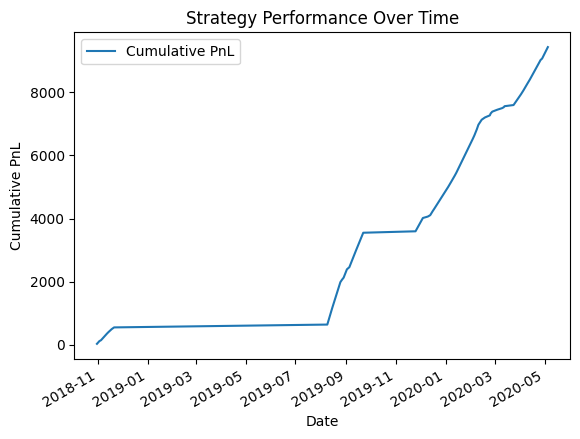

In [28]:
# Choose the strategy for which you want to plot the performance
strategy = best_result

# Calculate the cumulative PnL over time
cumulative_pnl = np.cumsum(strategy["pnl"])

# Create a DataFrame with the trade dates and cumulative PnL
trade_dates = strategy["trade_dates"]
performance_df = pd.DataFrame({"Date": trade_dates, "Cumulative PnL": cumulative_pnl})
performance_df.set_index("Date", inplace=True)

# Plot the cumulative PnL
performance_df.plot()
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.title("Strategy Performance Over Time")
plt.show()

#ResNet-LSTM Model

##Model BTC

In [36]:
# Define the model
class MyModel:
    def __init__(self, output_directory):
        self.output_directory = output_directory

    def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64
        input_layer = tf.keras.layers.Input(input_shape)
    
        # BLOCK 1

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)
    
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_1 = tf.keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)
        
        # expand channels for the sum
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_2 = tf.keras.layers.Activation('relu')(output_block_2)

                # BLOCK 3

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)

        shortcut_y = tf.keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_3 = tf.keras.layers.Activation('relu')(output_block_3)

        lstm_layer = tf.keras.layers.LSTM(100)(output_block_3)
        
        output_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')(lstm_layer)

        model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01),
                      metrics=['accuracy'])

        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.001)

        file_path = os.path.join(self.output_directory, 'best_model_btc.hdf5')

        model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_loss',
                                                          save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

# Initialize and train the model
output_directory = "model_output"
os.makedirs(output_directory, exist_ok=True)

##BTC-USD

In [37]:
#dates
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)
data = yf.download(tickers='BTC-USD', start=start,end=end, interval = '1d')
data.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
data=pd.DataFrame(data)

# Preprocess the data
data = data['Adj_Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create a dataset with a window size of 60
window_size = 60
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data[i - window_size:i, 0])
    y.append(data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
y_train_diff = np.diff(y_train)
y_test_diff = np.diff(y_test)
y_train_binary = np.zeros((y_train_diff.shape[0], 2))
y_test_binary = np.zeros((y_test_diff.shape[0], 2))

y_train_binary[y_train_diff >= 0, 1] = 1
y_train_binary[y_train_diff < 0, 0] = 1
y_test_binary[y_test_diff >= 0, 1] = 1
y_test_binary[y_test_diff < 0, 0] = 1

# Use 2 classes for binary classification (0 for price drop, 1 for price rise)
nb_classes = 2

my_model = MyModel(output_directory)
model = my_model.build_model(X_train.shape[1:], nb_classes)
history = model.fit(X_train[:-1], y_train_binary, epochs=100, batch_size=64, validation_data=(X_test[:-1], y_test_binary), callbacks=my_model.callbacks)

[*********************100%***********************]  1 of 1 completed


Epoch 1/100
23/23 [==============================] - 13s 67ms/step - loss: 0.5732 - accuracy: 0.7137 - val_loss: 0.6888 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 1s 30ms/step - loss: 0.5511 - accuracy: 0.7250 - val_loss: 0.6930 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.5256 - accuracy: 0.7427 - val_loss: 0.7007 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 1s 42ms/step - loss: 0.5177 - accuracy: 0.7314 - val_loss: 0.6805 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 1s 26ms/step - loss: 0.5244 - accuracy: 0.7328 - val_loss: 0.6885 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.5229 - accuracy: 0.7413 - val_loss: 0.6846 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - l

In [38]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train[:-1], y_train_binary)
test_loss, test_accuracy = model.evaluate(X_test[:-1], y_test_binary)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

12/12 [==============================] - 0s 7ms/step - loss: 0.5160 - accuracy: 0.7394
Train Loss: 0.5000863671302795, Train Accuracy: 0.746279239654541
Test Loss: 0.5160039067268372, Test Accuracy: 0.7393767833709717


In [39]:
model_path = os.path.join(output_directory, 'best_model_btc.hdf5')
model = load_model(model_path)

# 1. Predict the test data
y_pred_probs = model.predict(X_test[:-1])
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Compare predictions to real values
y_test_diff = np.diff(y_test)
y_test_real = np.where(y_test_diff >= 0, 1, 0)

# Calculate the number of correct predictions
correct_predictions = np.sum(y_pred == y_test_real)
accuracy = correct_predictions / len(y_test_real)
print(f'Accuracy: {accuracy:.2f}')

12/12 [==============================] - 1s 6ms/step
Accuracy: 0.75


In [40]:
# Initialize variables for the trading strategy
initial_capital = 10000
capital = initial_capital
take_profit_ratio = 1.03
stop_loss_ratio = 0.97

# Initialize the backtesting result list
backtest_results = []

# Iterate through the price data
for i in range(len(y_pred) - 1):
    trade_amount = capital
    entry_price = y_test[i]
    take_profit_price = entry_price * take_profit_ratio
    stop_loss_price = entry_price * stop_loss_ratio
    next_day_price = y_test[i + 1]

    if y_pred[i] == 1:  # Buy signal
        if next_day_price >= take_profit_price:
            profit = trade_amount * (take_profit_ratio - 1)
        elif next_day_price <= stop_loss_price:
            profit = trade_amount * (stop_loss_ratio - 1)
        else:
            profit = trade_amount * ((next_day_price / entry_price) - 1)

        capital += profit
        backtest_results.append({'Date': i, 'Action': 'Buy', 'Price': entry_price, 'Profit': profit, 'Capital': capital})

# Calculate the total return
total_return = ((capital - initial_capital) / initial_capital) * 100

# Print the backtesting result and total return
print("Backtesting Results:")
for result in backtest_results:
    print(result)
print(f"Total Return: {total_return:.2f}%", f"Final Capital: {capital:.2f}")
print("Total number of trading day on test set",len(y_pred))
print("Number of trades",len(backtest_results))

Backtesting Results:
{'Date': 1, 'Action': 'Buy', 'Price': 0.005642838110848848, 'Profit': 300.0000000000003, 'Capital': 10300.0}
{'Date': 3, 'Action': 'Buy', 'Price': 0.12528511253941388, 'Profit': 309.0000000000003, 'Capital': 10609.0}
{'Date': 7, 'Action': 'Buy', 'Price': 0.06727155337855056, 'Profit': 318.27000000000027, 'Capital': 10927.27}
{'Date': 9, 'Action': 'Buy', 'Price': 0.10795698295964712, 'Profit': 327.8181000000003, 'Capital': 11255.0881}
{'Date': 11, 'Action': 'Buy', 'Price': 0.06950108288570596, 'Profit': 337.65264300000035, 'Capital': 11592.740743000002}
{'Date': 12, 'Action': 'Buy', 'Price': 0.11136555145257032, 'Profit': 347.7822222900004, 'Capital': 11940.522965290002}
{'Date': 15, 'Action': 'Buy', 'Price': 0.011151184592012246, 'Profit': 358.21568895870035, 'Capital': 12298.738654248702}
{'Date': 16, 'Action': 'Buy', 'Price': 0.07216391696218544, 'Profit': 368.9621596274614, 'Capital': 12667.700813876163}
{'Date': 18, 'Action': 'Buy', 'Price': 0.01025357687468382

##Model ETH

In [41]:
# Define the model
class MyModel:
    def __init__(self, output_directory):
        self.output_directory = output_directory

    def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64
        input_layer = tf.keras.layers.Input(input_shape)
    
        # BLOCK 1

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)
    
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_1 = tf.keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)
        
        # expand channels for the sum
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_2 = tf.keras.layers.Activation('relu')(output_block_2)

                # BLOCK 3

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)

        shortcut_y = tf.keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_3 = tf.keras.layers.Activation('relu')(output_block_3)

        lstm_layer = tf.keras.layers.LSTM(100)(output_block_3)
        
        output_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')(lstm_layer)

        model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01),
                      metrics=['accuracy'])

        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.001)

        file_path = os.path.join(self.output_directory, 'best_model_eth.hdf5')

        model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_loss',
                                                          save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

# Initialize and train the model
output_directory = "model_output"
os.makedirs(output_directory, exist_ok=True)

##ETH-USD

In [42]:
#dates
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)
data = yf.download(tickers='ETH-USD', start=start,end=end, interval = '1d')
data.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
data=pd.DataFrame(data)

# Preprocess the data
data = data['Adj_Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create a dataset with a window size of 60
window_size = 60
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data[i - window_size:i, 0])
    y.append(data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
y_train_diff = np.diff(y_train)
y_test_diff = np.diff(y_test)
y_train_binary = np.zeros((y_train_diff.shape[0], 2))
y_test_binary = np.zeros((y_test_diff.shape[0], 2))

y_train_binary[y_train_diff >= 0, 1] = 1
y_train_binary[y_train_diff < 0, 0] = 1
y_test_binary[y_test_diff >= 0, 1] = 1
y_test_binary[y_test_diff < 0, 0] = 1

# Use 2 classes for binary classification (0 for price drop, 1 for price rise)
nb_classes = 2

my_model = MyModel(output_directory)
model = my_model.build_model(X_train.shape[1:], nb_classes)
history = model.fit(X_train[:-1], y_train_binary, epochs=100, batch_size=64, validation_data=(X_test[:-1], y_test_binary), callbacks=my_model.callbacks)

[*********************100%***********************]  1 of 1 completed


Epoch 1/100
23/23 [==============================] - 13s 65ms/step - loss: 0.5616 - accuracy: 0.7286 - val_loss: 0.6861 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 1s 30ms/step - loss: 0.5523 - accuracy: 0.7342 - val_loss: 0.6737 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 1s 24ms/step - loss: 0.5526 - accuracy: 0.7229 - val_loss: 0.6783 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 0.5488 - accuracy: 0.7364 - val_loss: 0.6767 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 1s 24ms/step - loss: 0.5481 - accuracy: 0.7427 - val_loss: 0.7187 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 0.5352 - accuracy: 0.7406 - val_loss: 0.6827 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 7/100
23/23 [==============================] - 1s 24ms/step - l

In [43]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train[:-1], y_train_binary)
test_loss, test_accuracy = model.evaluate(X_test[:-1], y_test_binary)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

12/12 [==============================] - 0s 6ms/step - loss: 0.5156 - accuracy: 0.7450
Train Loss: 0.5080159306526184, Train Accuracy: 0.7427356243133545
Test Loss: 0.5156065225601196, Test Accuracy: 0.7450425028800964


In [44]:
model_path = os.path.join(output_directory, 'best_model_eth.hdf5')
model = load_model(model_path)

# 1. Predict the test data
y_pred_probs = model.predict(X_test[:-1])
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Compare predictions to real values
y_test_diff = np.diff(y_test)
y_test_real = np.where(y_test_diff >= 0, 1, 0)

# Calculate the number of correct predictions
correct_predictions = np.sum(y_pred == y_test_real)
accuracy = correct_predictions / len(y_test_real)
print(f'Accuracy: {accuracy:.2f}')

12/12 [==============================] - 2s 6ms/step
Accuracy: 0.76


In [45]:
# Initialize variables for the trading strategy
initial_capital = 10000
capital = initial_capital
take_profit_ratio = 1.03
stop_loss_ratio = 0.97

# Initialize the backtesting result list
backtest_results = []

# Iterate through the price data
for i in range(len(y_pred) - 1):
    trade_amount = capital
    entry_price = y_test[i]
    take_profit_price = entry_price * take_profit_ratio
    stop_loss_price = entry_price * stop_loss_ratio
    next_day_price = y_test[i + 1]

    if y_pred[i] == 1:  # Buy signal
        if next_day_price >= take_profit_price:
            profit = trade_amount * (take_profit_ratio - 1)
        elif next_day_price <= stop_loss_price:
            profit = trade_amount * (stop_loss_ratio - 1)
        else:
            profit = trade_amount * ((next_day_price / entry_price) - 1)

        capital += profit
        backtest_results.append({'Date': i, 'Action': 'Buy', 'Price': entry_price, 'Profit': profit, 'Capital': capital})

# Calculate the total return
total_return = ((capital - initial_capital) / initial_capital) * 100

# Print the backtesting result and total return
print("Backtesting Results:")
for result in backtest_results:
    print(result)
print(f"Total Return: {total_return:.2f}%", f"Final Capital: {capital:.2f}")
print("Total number of trading day on test set",len(y_pred))
print("Number of trades",len(backtest_results))

Backtesting Results:
{'Date': 1, 'Action': 'Buy', 'Price': 0.00678332146050159, 'Profit': 300.0000000000003, 'Capital': 10300.0}
{'Date': 3, 'Action': 'Buy', 'Price': 0.060632971146245655, 'Profit': 309.0000000000003, 'Capital': 10609.0}
{'Date': 7, 'Action': 'Buy', 'Price': 0.014162342830457815, 'Profit': 318.27000000000027, 'Capital': 10927.27}
{'Date': 9, 'Action': 'Buy', 'Price': 0.02828849436954796, 'Profit': 327.8181000000003, 'Capital': 11255.0881}
{'Date': 11, 'Action': 'Buy', 'Price': 0.03321443137772665, 'Profit': 337.65264300000035, 'Capital': 11592.740743000002}
{'Date': 15, 'Action': 'Buy', 'Price': 0.013076445943150453, 'Profit': -347.7822222900004, 'Capital': 11244.958520710003}
{'Date': 16, 'Action': 'Buy', 'Price': 0.011563760666375354, 'Profit': 337.34875562130037, 'Capital': 11582.307276331303}
{'Date': 18, 'Action': 'Buy', 'Price': 0.011319076101122944, 'Profit': 347.4692182899394, 'Capital': 11929.776494621243}
{'Date': 19, 'Action': 'Buy', 'Price': 0.0420272811267

##Model BNB

In [52]:
# Define the model
class MyModel:
    def __init__(self, output_directory):
        self.output_directory = output_directory

    def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64
        input_layer = tf.keras.layers.Input(input_shape)
    
        # BLOCK 1

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)
    
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_1 = tf.keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)
        
        # expand channels for the sum
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_2 = tf.keras.layers.Activation('relu')(output_block_2)

                # BLOCK 3

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)
        conv_x = tf.keras.layers.Dropout(0.5)(conv_x)
        
        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)
        conv_y = tf.keras.layers.Dropout(0.5)(conv_y)
        
        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)
        conv_z = tf.keras.layers.Dropout(0.5)(conv_z)

        shortcut_y = tf.keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_3 = tf.keras.layers.Activation('relu')(output_block_3)

        lstm_layer = tf.keras.layers.LSTM(100)(output_block_3)
        
        output_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')(lstm_layer)

        model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01),
                      metrics=['accuracy'])

        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.001)

        file_path = os.path.join(self.output_directory, 'best_model_bnb.hdf5')

        model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_loss',
                                                          save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

# Initialize and train the model
output_directory = "model_output"
os.makedirs(output_directory, exist_ok=True)

##BNB-USD

In [53]:
#dates
start = datetime.datetime(2018,4,28)
end = datetime.datetime(2023,4,28)
data = yf.download(tickers='BNB-USD', start=start,end=end, interval = '1d')
data.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
data=pd.DataFrame(data)

# Preprocess the data
data = data['Adj_Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create a dataset with a window size of 60
window_size = 60
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data[i - window_size:i, 0])
    y.append(data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
y_train_diff = np.diff(y_train)
y_test_diff = np.diff(y_test)
y_train_binary = np.zeros((y_train_diff.shape[0], 2))
y_test_binary = np.zeros((y_test_diff.shape[0], 2))

y_train_binary[y_train_diff >= 0, 1] = 1
y_train_binary[y_train_diff < 0, 0] = 1
y_test_binary[y_test_diff >= 0, 1] = 1
y_test_binary[y_test_diff < 0, 0] = 1

# Use 2 classes for binary classification (0 for price drop, 1 for price rise)
nb_classes = 2

my_model = MyModel(output_directory)
model = my_model.build_model(X_train.shape[1:], nb_classes)
history = model.fit(X_train[:-1], y_train_binary, epochs=100, batch_size=64, validation_data=(X_test[:-1], y_test_binary), callbacks=my_model.callbacks)

[*********************100%***********************]  1 of 1 completed


Epoch 1/100
23/23 [==============================] - 13s 66ms/step - loss: 0.6072 - accuracy: 0.6811 - val_loss: 0.6813 - val_accuracy: 0.7365 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 0.5600 - accuracy: 0.7356 - val_loss: 0.6923 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 1s 24ms/step - loss: 0.5760 - accuracy: 0.7208 - val_loss: 0.6893 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 0.5700 - accuracy: 0.7208 - val_loss: 0.6923 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 1s 31ms/step - loss: 0.5568 - accuracy: 0.7356 - val_loss: 0.6872 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 6/100
23/23 [==============================] - 1s 34ms/step - loss: 0.5536 - accuracy: 0.7271 - val_loss: 0.6884 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 7/100
23/23 [==============================] - 1s 32ms/step - l

In [54]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train[:-1], y_train_binary)
test_loss, test_accuracy = model.evaluate(X_test[:-1], y_test_binary)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

12/12 [==============================] - 0s 8ms/step - loss: 0.5105 - accuracy: 0.7422
Train Loss: 0.5145776271820068, Train Accuracy: 0.7420269250869751
Test Loss: 0.5105104446411133, Test Accuracy: 0.7422096133232117


In [55]:
model_path = os.path.join(output_directory, 'best_model_bnb.hdf5')
model = load_model(model_path)

# 1. Predict the test data
y_pred_probs = model.predict(X_test[:-1])
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Compare predictions to real values
y_test_diff = np.diff(y_test)
y_test_real = np.where(y_test_diff >= 0, 1, 0)

# Calculate the number of correct predictions
correct_predictions = np.sum(y_pred == y_test_real)
accuracy = correct_predictions / len(y_test_real)
print(f'Accuracy: {accuracy:.2f}')

12/12 [==============================] - 1s 6ms/step
Accuracy: 0.77


In [56]:
# Initialize variables for the trading strategy
initial_capital = 10000
capital = initial_capital
take_profit_ratio = 1.03
stop_loss_ratio = 0.97

# Initialize the backtesting result list
backtest_results = []

# Iterate through the price data
for i in range(len(y_pred) - 1):
    trade_amount = initial_capital
    entry_price = y_test[i]
    take_profit_price = entry_price * take_profit_ratio
    stop_loss_price = entry_price * stop_loss_ratio
    next_day_price = y_test[i + 1]

    if y_pred[i] == 1:  # Buy signal
        if next_day_price >= take_profit_price:
            profit = trade_amount * (take_profit_ratio - 1)
        elif next_day_price <= stop_loss_price:
            profit = trade_amount * (stop_loss_ratio - 1)
        else:
            profit = trade_amount * ((next_day_price / entry_price) - 1)

        capital += profit
        backtest_results.append({'Date': i, 'Action': 'Buy', 'Price': entry_price, 'Profit': profit, 'Capital': capital})

# Calculate the total return
total_return = ((capital - initial_capital) / initial_capital) * 100

# Print the backtesting result and total return
print("Backtesting Results:")
for result in backtest_results:
    print(result)
print(f"Total Return: {total_return:.2f}%", f"Final Capital: {capital:.2f}")
print("Total number of trading day on test set",len(y_pred))
print("Number of trades",len(backtest_results))

Backtesting Results:
{'Date': 1, 'Action': 'Buy', 'Price': 0.0032908552601619004, 'Profit': 300.0000000000003, 'Capital': 10300.0}
{'Date': 3, 'Action': 'Buy', 'Price': 0.03543715166360395, 'Profit': 300.0000000000003, 'Capital': 10600.0}
{'Date': 7, 'Action': 'Buy', 'Price': 0.01660699297279297, 'Profit': 300.0000000000003, 'Capital': 10900.0}
{'Date': 9, 'Action': 'Buy', 'Price': 0.025095262273649856, 'Profit': 300.0000000000003, 'Capital': 11200.0}
{'Date': 11, 'Action': 'Buy', 'Price': 0.03702864309952764, 'Profit': -300.0000000000003, 'Capital': 10900.0}
{'Date': 12, 'Action': 'Buy', 'Price': 0.03117424563183523, 'Profit': 300.0000000000003, 'Capital': 11200.0}
{'Date': 15, 'Action': 'Buy', 'Price': 0.008886529367090768, 'Profit': 300.0000000000003, 'Capital': 11500.0}
{'Date': 16, 'Action': 'Buy', 'Price': 0.0148544787364558, 'Profit': 300.0000000000003, 'Capital': 11800.0}
{'Date': 18, 'Action': 'Buy', 'Price': 0.013831843777699904, 'Profit': -300.0000000000003, 'Capital': 11500